In [ ]:
# Backtesting introduction
# in this example we're using the simplest moving average strategy
# Buy when:
# Close > moving average
# Sell when:
# Close < moving average

In [18]:
import pandas as pd
import yfinance as yf
import numpy as np

In [ ]:
df = yf.download('^GSPC',start='2015-01-01')

In [7]:
# Calulating Moving Average
df['MA100'] = df.Close.rolling(100).mean()

In [8]:
df.dropna(inplace=True)

<Axes: xlabel='Date'>

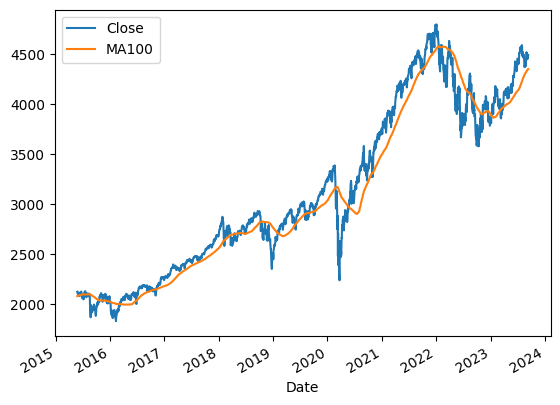

In [11]:
df[['Close','MA100']].plot()

In [12]:
# Since we use the closing price as reference, we need to shift back by a day
df['price']  = df.Open.shift(-1)

In [ ]:
buyprices, sellprices = [], []

in_position = False

for index, row in df.iterrows():
  if not in_position and row.Close > row.MA100:
    buyprices.append(row.price)
    in_position = True
  if in_position and row.Close < row.MA100:
    sellprices.append(row.price)
    in_position = False

# we need the final if to make both lists of even length
if in_position:
  sellprices.append(row.Close)

In [24]:
trades = pd.DataFrame({
    'buys':buyprices,
    'sells':sellprices
})

In [34]:
trades['profit'] = (trades.sells - trades.buys)/trades.buys

In [30]:
# then we accumulate the profits
(trades.profit +1).prod() -1
# roughly a 39% profit (WITHOUT TRADING FEES)

0.3919842349324121

In [31]:
1000 * (trades.profit +1).prod()

1391.9842349324122

In [35]:
# Calculating trading fees
# let's assume 0.5%

trades['after fees'] = (trades.sells - trades.buys)/trades.buys - 0.005

In [ ]:
(trades.profit +1).prod() -1
# all the way down to 7.41% !

VECTORIZATION

In [ ]:
# We are constructing the same Backtest from before, but tihis time without any loops

In [40]:
first_buy = pd.Series(df.index == (df.Close > df.MA100).idxmax(),index=df.index)

In [41]:
first_buy | (df.Close > df.MA100).diff()

Date
2015-05-27     True
2015-05-28    False
2015-05-29    False
2015-06-01    False
2015-06-02    False
              ...  
2023-09-05    False
2023-09-06    False
2023-09-07    False
2023-09-08    False
2023-09-11    False
Length: 2088, dtype: bool

In [44]:
df[first_buy | (df.Close > df.MA100).diff()]

,Open,High,Low,Close,Adj Close,Volume,MA100,price
Date,,,,,,,,
2015-05-27,2105.129883,2126.219971,2105.129883,2123.479980,2123.479980,3127960000,2078.878900,2122.270020
2015-06-08,2092.340088,2093.010010,2079.110107,2079.280029,2079.280029,2917150000,2084.538904,2079.070068
2015-06-10,2081.120117,2108.500000,2081.120117,2105.199951,2105.199951,3414320000,2086.353002,2106.239990
2015-06-15,2091.340088,2091.340088,2072.489990,2084.429932,2084.429932,3061570000,2088.486102,2084.260010
2015-06-16,2084.260010,2097.399902,2082.100098,2096.290039,2096.290039,2919900000,2088.817504,2097.399902
...,...,...,...,...,...,...,...,...
2023-03-16,3878.929932,3964.459961,3864.110107,3960.280029,3960.280029,5695790000,3953.868914,3958.689941
2023-03-17,3958.689941,3958.909912,3901.270020,3916.639893,3916.639893,9354280000,3955.507812,3917.469971
2023-03-21,3975.889893,4009.080078,3971.189941,4002.870117,4002.870117,4920240000,3958.487712,4002.040039


In [43]:
df.Close.iloc[-1:]

Date
2023-09-11    4487.459961
Name: Close, dtype: float64

In [45]:
if len(trades) % 2 != 0:
    mtm = df.Close[-1:]
    trades = pd.concat([trades,mtm])

In [46]:
buys = trades[::2]
sells = trades[1::2]
profits = (sells.values - buys.values)/buys.values

In [47]:
(profits + 1).prod() - 1

2931934.0056642285